<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Test-case-№1:" data-toc-modified-id="Test-case-№1:-1">Test case №1:</a></span></li><li><span><a href="#Test-case-№2:" data-toc-modified-id="Test-case-№2:-2">Test case №2:</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2.1">Data Exploration</a></span></li><li><span><a href="#Cleaning-the-Data" data-toc-modified-id="Cleaning-the-Data-2.2">Cleaning the Data</a></span></li><li><span><a href="#Feature-Analysis" data-toc-modified-id="Feature-Analysis-2.3">Feature Analysis</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.4">Feature Engineering</a></span></li><li><span><a href="#Final-assessment" data-toc-modified-id="Final-assessment-2.5">Final assessment</a></span></li></ul></li></ul></div>

## Test case №1:
<div class="alert alert-info">
    We extracted data from GCP. The dataset contains 4 million rows, but we were only able to extract them in small portions, about 40,000 rows in CSV format. In total, we ended up with 110 files. The files are named as follows:

data_000000000001.csv
data_000000000002.csv
…..
data_000000000010.csv
data_000000000011.csv
……
data_000000000100.csv
data_000000000101.csv
….
data_000000000110.csv

Please suggest a method for uploading all these 110 files using Jupyter Notebook (or another) and merging them into a single dataset for further processing.
    </div>

In [1]:
import pandas as pd
import glob

# get the list of file paths using glob module
file_paths = glob.glob("path/to/files/data_*.csv")

# initialize an empty DataFrame to store the merged data
all_data = pd.DataFrame()

# loop through each file and concatenate data
for file_path in file_paths:
    df = pd.read_csv(file_path)
    all_data = pd.concat([all_data, df], ignore_index=True)

# check the first few rows of the merged data
print(all_data.head())


Empty DataFrame
Columns: []
Index: []


## Test case №2:
<div class="alert alert-info">
    You can find the file in this folder, which contains Linkedin profile scrapes of individuals that were part of an outreach effort. The goal is to get people to purchase a ticket to an event and ultimately join the organization as a member.  Since the same method of profile scraping will be used in the future to identify the best leads, it's important that patterns that exist in the content of the profiles be identified.

The column 'Result' has one of six outcomes for each person:
- **Purchased membership**: The ideal outcome, bought an event ticket and a membership
- **Purchased event**: A positive outcome but not ideal
- Approved: They were approved to come to an event but did not purchase
- Sent personal f/u: Conversation was started but ended
- Out of sequence: Conversation was started but ended
- 2021 Member: Someone who was a previous member of the organization

In order to better focus outreach efforts in the future, we need to determine which characteristics show a higher probability of purchasing a membership and/or purchasing an event ticket.

Please provide an analysis that identifies what traits, characteristics, patterns, etc. can be used to indicate a higher probability of a positive/ideal outcome and please describe your methodology.
</div>

### Data Exploration

In this section we will generally study the provided data: their number, the presence of duplicates, the number of omissions in the data. We will evaluate the distribution of users by the final result (taking or not taking a target action). 

In [2]:
# load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

pd.set_option('display.max_columns', 1000)

In [3]:
# check the basic info abouth the dataset
linkedin_data = pd.read_csv('Linkedin_Accounts.csv')
linkedin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   linkedinProfile               348 non-null    object 
 1   Result                        348 non-null    object 
 2   Other                         191 non-null    object 
 3   email                         216 non-null    object 
 4   description                   279 non-null    object 
 5   headline                      347 non-null    object 
 6   location                      348 non-null    object 
 7   firstName                     348 non-null    object 
 8   lastName                      348 non-null    object 
 9   fullName                      348 non-null    object 
 10  subscribers                   347 non-null    float64
 11  userId                        289 non-null    float64
 12  mutualConnectionsText         4 non-null      object 
 13  mailF

In [4]:
linkedin_data = linkedin_data.drop_duplicates()
len(linkedin_data)

348

No duplicates were found in the data. Let's study the distribution of the number of users among the main categories by final actions. 

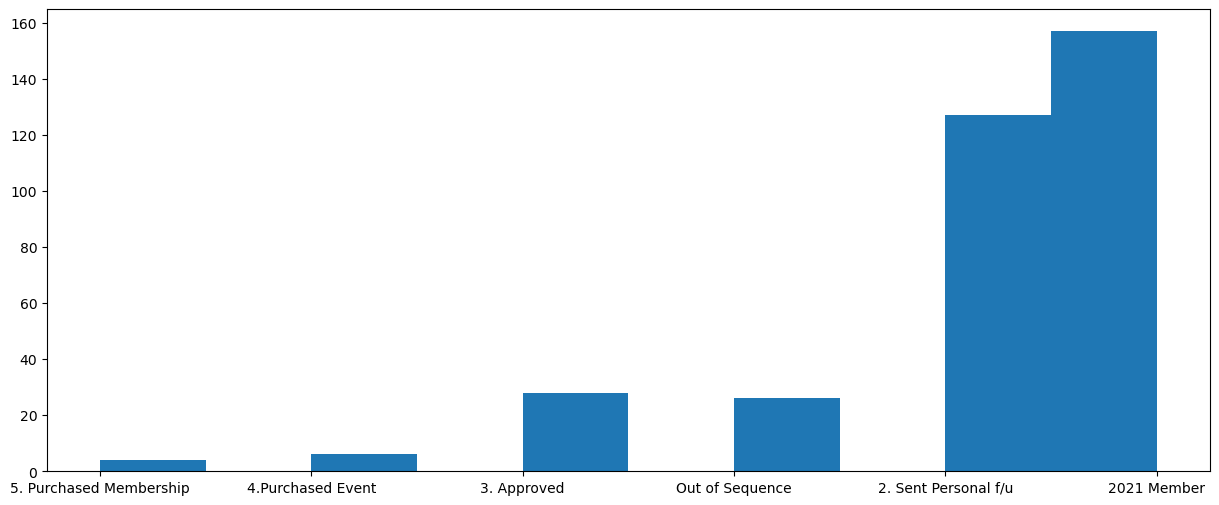

In [5]:
plt.figure(figsize=(15, 6))
plt.hist(linkedin_data['Result']);

In [6]:
print(f"Total Purchased Membership: {len(linkedin_data[linkedin_data['Result'] == '5. Purchased Membership'])}")
print(f"Total Purchased Event: {len(linkedin_data[linkedin_data['Result'] == '4.Purchased Event'])}")

Total Purchased Membership: 4
Total Purchased Event: 6


Only 10 users took the targeted action. 

### Cleaning the Data

Since there are many omissions in the data, we will remove those columns with more than 50% of the data missing. 

In [7]:
pd.DataFrame(round((linkedin_data.isna().mean()*100))).style.background_gradient('coolwarm')

,0
linkedinProfile,0.000000
Result,0.000000
Other,45.000000
email,38.000000
description,20.000000
headline,0.000000
location,0.000000
firstName,0.000000
lastName,0.000000
fullName,0.000000


In [29]:
# threshold for removing columns with gaps
threshold = len(linkedin_data) * 0.5

# delete columns where the number of gaps is greater than 50%
linkedin_data = linkedin_data.dropna(thresh=threshold, axis=1)

Still quite a few columns to "manually" analyze. Let's look at the columns, maybe some of the data is of little value or can be merged or interchanged. 

In [9]:
linkedin_data.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,subscribers,userId,company,companyUrl,jobTitle,jobLocation,jobDateRange,company2,companyUrl2,jobTitle2,jobDescription2,jobDateRange2,school,schoolUrl,schoolDegree,schoolDegreeSpec,schoolDateRange,school2,schoolDateRange2,civilityFromDropContact,websiteFromDropContact,website,companyWebsite,allSkills,skill1,endorsement1,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,baseUrl,profileId,timestamp,jobLocation2
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,1704.0,3172258.0,Aeroscena,https://www.linkedin.com/company/aeroscena/,CEO,"Cleveland/Akron, Ohio Area",Sep 2010 â€“ Present,Cleveland Clinic Wellness Institute,https://www.linkedin.com/company/cleveland-cli...,Advisor to the Chairman,Supporting the Chairman of the Wellness Instit...,2009 â€“ 2010,Audencia Nantes Ecole de Management,https://www.linkedin.com/school/19998/?legacyS...,master,marketing,1984 â€“ 1985,The Ohio State University,1979 â€“ 1983,Mr,www.aeroscena.com,stumbleupon.com/content/1LSMVB,https://aeroscena.com,"Strategic Planning, Leadership, Marketing Stra...",Strategic Planning,31,Leadership,26,Marketing Strategy,24,Strategy,21,New Business Development,18,Business Strategy,15,https://www.linkedin.com/in/mark-kohoot-96a08b1,mark-kohoot-96a08b1,2022-01-03T20:00:58.586Z,NaN
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,1745.0,14910006.0,Kids Draw Bob,https://www.linkedin.com/company/kidsdrawbob/,President and Illustrator,"Bloomfield Hills, MI",Jul 2019 â€“ Present,"High Level Marketing, LLC",https://www.linkedin.com/company/high-level-ma...,Co Founder and CTO - VP of Product Development,As one of the fastest growing online marketing...,Nov 2009 â€“ Present,University of Michigan,https://www.linkedin.com/school/18633/?legacyS...,Bachelor of Science (B.S.),Architecture,1999 â€“ 2004,Walled Lake Central High School,1995 â€“ 1999,Mr,www.kidsdraw.org,NaN,http://www.kidsdraw.org/donate,"Web Design, Marketing, Business Strategy, SEO,...",Web Design,99,Marketing,66,Business Strategy,11,SEO,47,Web Development,40,Online Marketing,32,https://www.linkedin.com/in/jonbowerman,jonbowerman,2022-01-03T20:01:43.218Z,"West Bloomfield, MI"
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,#NAME?,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,2549.0,22364061.0,HedgeHog Health,https://www.linkedin.com/company/hedgehoghealth/,Chief Executive Officer,NaN,Nov 2019 â€“ Present,Born and Raised Detroit Foundation,https://www.linkedin.com/company/born-and-rais...,Executive Director,â€¢Organize events in cities from coast to coa...,Jan 2016 â€“ Present,New York University,https://www.linkedin.com/school/18993/?legacyS...,Dual MA,"Childhood Education, Special Education",2011 â€“ 2013,Indiana University Bloomington,2002 â€“ 2006,Mr,www.hedgehoghealth.com,bornandraiseddetroit.org/,http://www.hedgehoghealth.com,"Editing, Blogging, Social Media, Event Plannin...",Editing,39,Blogging,31,Social Media,25,Event Planning,14,SEO,11,Curriculum Development,8,https://www.linkedin.com/in/parkeralynch,parkeralynch,2022-01-03T20:02:59.669Z,Greater Detroit Area
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,1696.0,35484653.0,BadTestingÂ® â€” Better 

We leave only the most interesting data for analysis, which potentially carry important user characteristics. 

In [10]:
selected_columns = ['profileId', 'Result', 'Other', 
       'headline', 'location', 'subscribers', 'company', 'jobTitle',
       'jobLocation', 'jobDateRange', 'school', 'school2', 
       'allSkills']

linkedin_data = linkedin_data[selected_columns]

linkedin_data.describe(include='object')

,profileId,Result,Other,headline,location,company,jobTitle,jobLocation,jobDateRange,school,school2,allSkills
count,348,348,191,347,348,346,347,215,342,328,208,330
unique,346,6,4,344,205,342,203,152,189,269,200,328
top,bill-cochrane-7495667,2021 Member,Hunter,Co-Founder at Foothold,"Austin, Texas, United States",Foothold,Founder,United States,Jan 2020 â€“ Present,The Ohio State University,University of Wisconsin-Madison,"Nonprofit Management, Program Management, Proj..."
freq,2,157,142,2,14,2,39,14,10,7,3,2


Checking for duplicates again. 

In [11]:
# check data for duplicates
linkedin_data = linkedin_data.drop_duplicates()
len(linkedin_data)

346

Two lines with duplicates have been deleted. 
Let's take a look at the new, cleaned up dataset. 

In [12]:
linkedin_data.head()

,profileId,Result,Other,headline,location,subscribers,company,jobTitle,jobLocation,jobDateRange,school,school2,allSkills
0,mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",1704.0,Aeroscena,CEO,"Cleveland/Akron, Ohio Area",Sep 2010 â€“ Present,Audencia Nantes Ecole de Management,The Ohio State University,"Strategic Planning, Leadership, Marketing Stra..."
1,jonbowerman,5. Purchased Membership,Hunter,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",1745.0,Kids Draw Bob,President and Illustrator,"Bloomfield Hills, MI",Jul 2019 â€“ Present,University of Michigan,Walled Lake Central High School,"Web Design, Marketing, Business Strategy, SEO,..."
2,parkeralynch,5. Purchased Membership,Hunter,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",2549.0,HedgeHog Health,Chief Executive Officer,NaN,Nov 2019 â€“ Present,New York University,Indiana University Bloomington,"Editing, Blogging, Social Media, Event Plannin..."
3,shacharschiff,5. Purchased Membership,Hunter,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,1696.0,BadTestingÂ® â€” Better Software. On Time.,Founder and Principal,"Austin, Texas, United States",Mar 2012 â€“ Present,DeVry University,NaN,"Software Quality Assurance, Quality Assurance,..."
4,gary-lacourt-811b1874,4.Purchased Event,Hunter,"Founder and CEO, Forever Companies","Milwaukee, Wisconsin, United States",710.0,Forever Companies,Founder & CEO,Greater Milwaukee Area,Aug 2004 â€“ Present,Northwestern University,University of Wisconsin-Milwaukee,"Marketing Strategy, Jewelry Design, E-commerce..."


Let's perform some more small manipulations with the dataset. For convenience, we will slightly change the data in a couple of columns and put the categories in order. 

In [13]:
# cleaning and standardizing job titles and skills
# convert the values in the 'jobTitle' column to lower case using .loc
linkedin_data['job_title'] = linkedin_data['jobTitle'].str.lower().str.strip()

# turn skills into lists
linkedin_data['skills_list'] = linkedin_data['allSkills'].str.lower().str.split(',')

# get rid of the old columns that we just replaced
linkedin_data = linkedin_data.drop(columns=['jobTitle', 'allSkills'])

# simplifying the Result column for easier analysis
# mapping the Result to a simpler form
result_mapping = {
    '5. Purchased Membership': 'Purchased Membership',
    '4.Purchased Event': 'Purchased Event',
    '3. Approved': 'Approved',
    '2. Sent Personal f/u': 'Sent Follow-up',
    'Out of Sequence': 'Out of Sequence',
    '2021 Member': '2021 Member'
}
linkedin_data['Result'] = linkedin_data['Result'].map(result_mapping)

# extracting and standardizing location
linkedin_data['location_standard'] = linkedin_data['location'].str.split(',').str[0].str.strip()

Notice that the locations are listed in different forms. Not everywhere the country is specified, or not everywhere it is the USA. Let's find out the number of such lines. 

In [14]:
# select rows that do not contain the string 'United States' in the 'Country' column
not_from_us = linkedin_data[~linkedin_data['location'].str.contains('United States')]

print(f'Not from the US: {len(not_from_us) / len(linkedin_data) * 100: .1f}%')

Not from the US:  26.0%


In this section, we removed columns with a lot of omissions from the dataset, replaced and tidied up some columns. We found out that 26% of locations do not contain the country or it is not the United States.

### Feature Analysis

Now let's move on to explore the differences between target users and everyone else in more detail. Let's find the share of users who performed a target action: **Purchased Membership** or **Purchased Event**.

In [30]:
print(f"% Purchased Membership: {len(linkedin_data[linkedin_data['Result'] == 'Purchased Membership']) * 100 / len(linkedin_data) : .1f}%")
print(f"% Purchased Event: {len(linkedin_data[linkedin_data['Result'] == 'Purchased Event']) * 100 / len(linkedin_data) : .1f}%")

% Purchased Membership:  1.2%
% Purchased Event:  1.7%


Let's study the overall distribution of users by parameters such as occupation and location. Let's display only the top 10 for each of the parameters. 

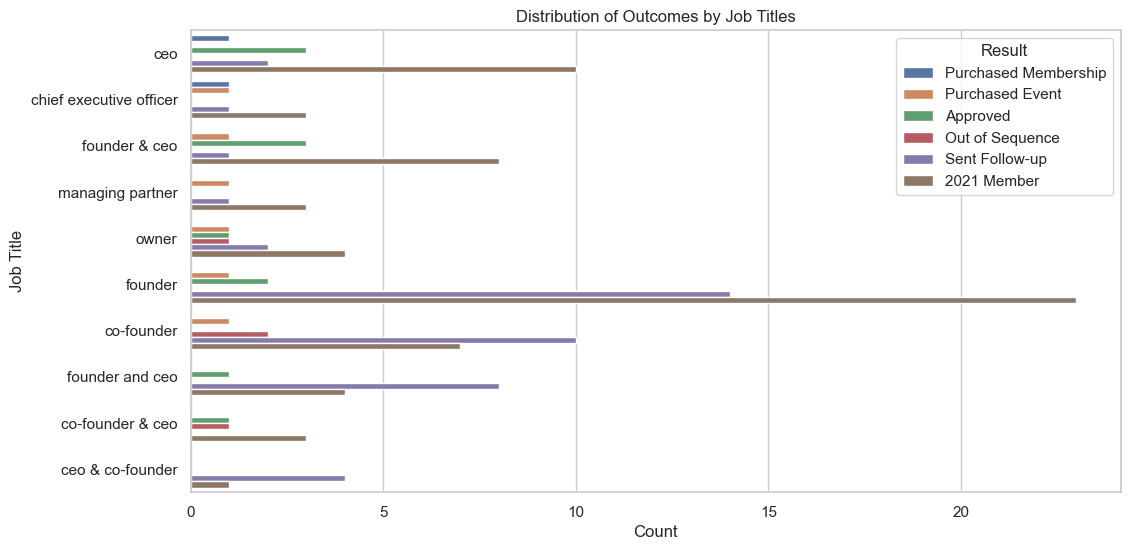

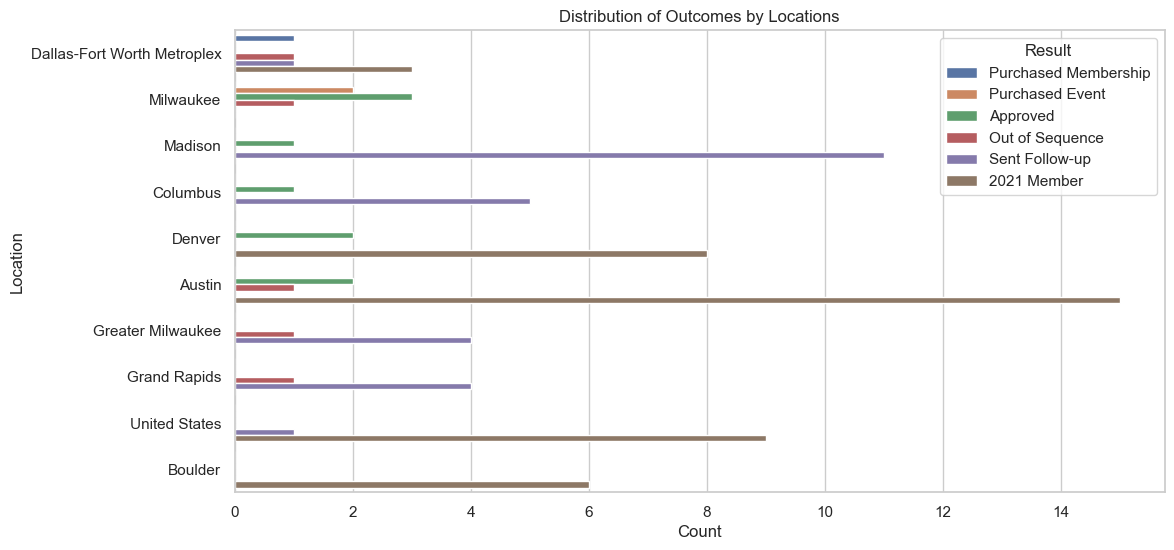

In [16]:
# setting plot style
sns.set(style="whitegrid")

# analyzing the distribution of outcomes across different job titles
top_job_titles = linkedin_data['job_title'].value_counts().head(10).index
data_top_job_titles = linkedin_data[linkedin_data['job_title'].isin(top_job_titles)]

plt.figure(figsize=(12, 6))
sns.countplot(data=data_top_job_titles, y='job_title', hue='Result')
plt.title('Distribution of Outcomes by Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

# analyzing the distribution of outcomes across different locations
top_locations = linkedin_data['location_standard'].value_counts().head(10).index
data_top_locations = linkedin_data[linkedin_data['location_standard'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=data_top_locations, y='location_standard', hue='Result')
plt.title('Distribution of Outcomes by Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


Among all users, ceo's and founders have the highest number of users. Austin and Millwaukee stand out in terms of location, although the number of users from each city is not as large relative to the total. Targeted users do not stand out among the rest. 

### Feature Engineering
For ease of analysis, let's reduce the number of user groups by target action to two. The `"Best leads"` category includes users who purchased Event or Membership. All others will be categorized as `"Others"`. 
Extract meaningful features from the existing data (e.g., categorize job titles, extract skills).

In [17]:
# define a custom function to merge categories
def combine_categories(result):
    if result == 'Purchased Event' or result == 'Purchased Membership':
        return 'Best leads'
    else:
        return 'Others'

In [18]:
# apply a custom function to the 'Result' column using the apply() method
linkedin_data['leads_category'] = linkedin_data['Result'].apply(combine_categories)

Since some similarity in the job titles could be seen in the chart in the previous section, we can combine the closest in meaning (ceo, founder, chief executive officer) into the top 10 names of the category. 

In [19]:
def categorize_occupation(job):
    if isinstance(job, str) and ('ceo' in job or 'founder' in job or 'chief executive officer' in job):
        return 'ceo, founder'
    else:
        return job

linkedin_data['job_title_new'] = linkedin_data['job_title'].apply(categorize_occupation)

Let's reconstruct the distribution of job titles by consolidated categories. 

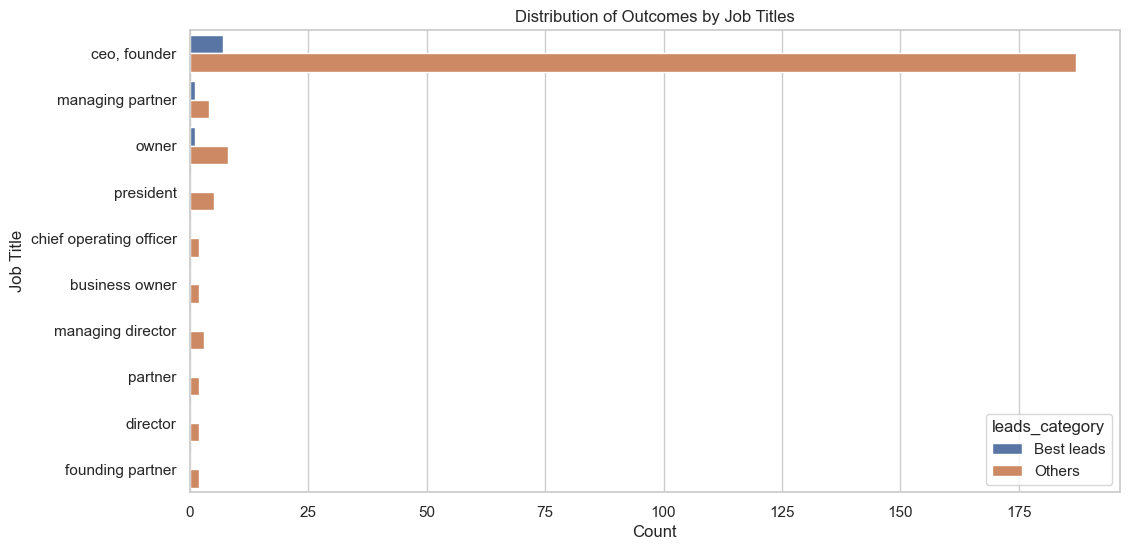

In [20]:
# setting plot style
sns.set(style="whitegrid")

# analyzing the distribution of outcomes across different job titles
top_job_titles = linkedin_data['job_title_new'].value_counts().head(10).index
data_top_job_titles = linkedin_data[linkedin_data['job_title_new'].isin(top_job_titles)]

plt.figure(figsize=(12, 6))
sns.countplot(data=data_top_job_titles, y='job_title_new', hue='leads_category')
plt.title('Distribution of Outcomes by Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

So among the users in the dataset, ceo and founders are definitely leading the way, as well as the target group. 
Now let's assess the locations.

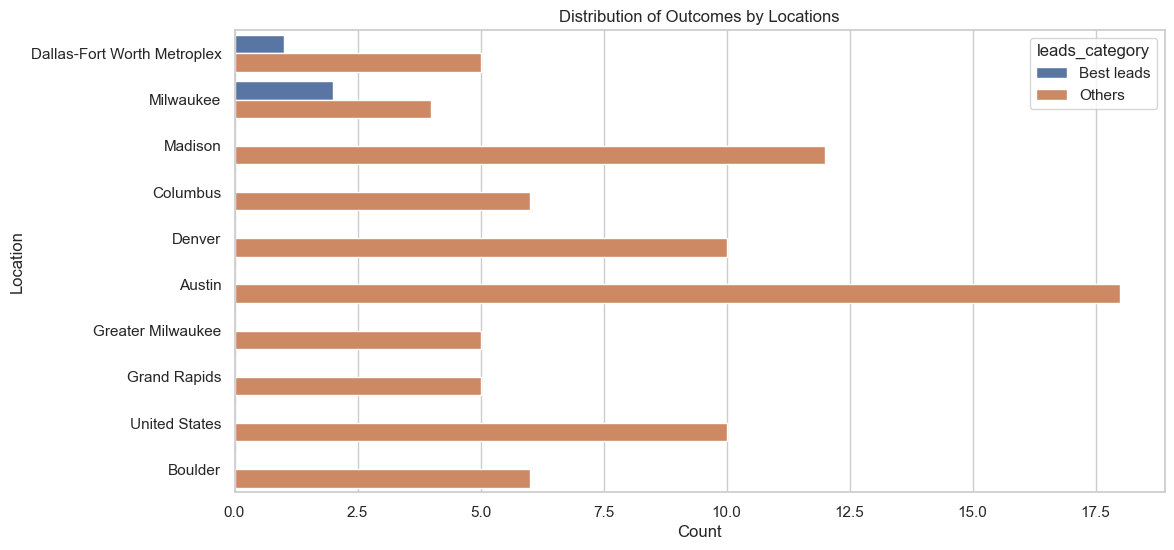

In [21]:
# analyzing the distribution of outcomes across different locations
top_locations = linkedin_data['location_standard'].value_counts().head(10).index
data_top_locations = linkedin_data[linkedin_data['location_standard'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=data_top_locations, y='location_standard', hue='leads_category')
plt.title('Distribution of Outcomes by Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

There is some variation, but overall too few users in each city to speak of any meaningful difference between users. Let's just look at the locations of the target users in the table. 

In [28]:
# separate the target users into one table
bl_companies = linkedin_data[linkedin_data['leads_category'] == 'Best leads']
bl_companies[['profileId', 'location']].T

,0,1,2,3,4,5,6,7,8,9
profileId,mark-kohoot-96a08b1,jonbowerman,parkeralynch,shacharschiff,gary-lacourt-811b1874,lyle-stoflet-38a07ab8,whiteandrewdc,donniemcfall,sykraft,alan-dahl-2a6781b
location,"Cleveland, Ohio, United States","Farmington, Michigan, United States","Royal Oak, Michigan, United States",Dallas-Fort Worth Metroplex,"Milwaukee, Wisconsin, United States","Milwaukee, Wisconsin, United States","Holland, Michigan, United States","Minneapolis, Minnesota, United States",Los Angeles Metropolitan Area,Atlanta Metropolitan Area


Two are from Milwaukee, the rest are from different towns. Let's look at the number of subscribers of our users. 

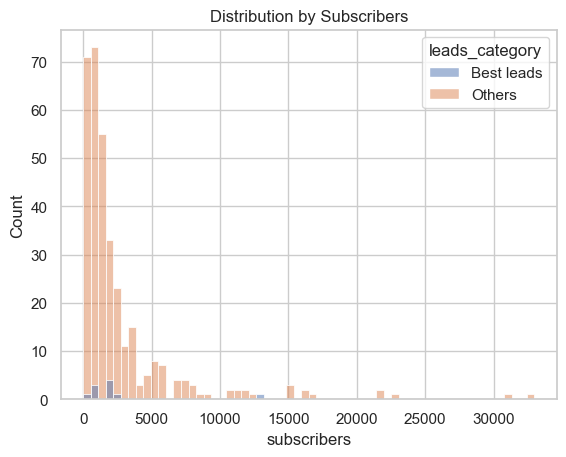

In [31]:
sns.histplot(data=linkedin_data, x='subscribers', hue='leads_category', element='bars', stat='count')
plt.title('Distribution by Subscribers');

Targeted users don't stand out from the rest. They generally do not have more than 2500 subscribers.  Let's study the distribution of users by companies. 

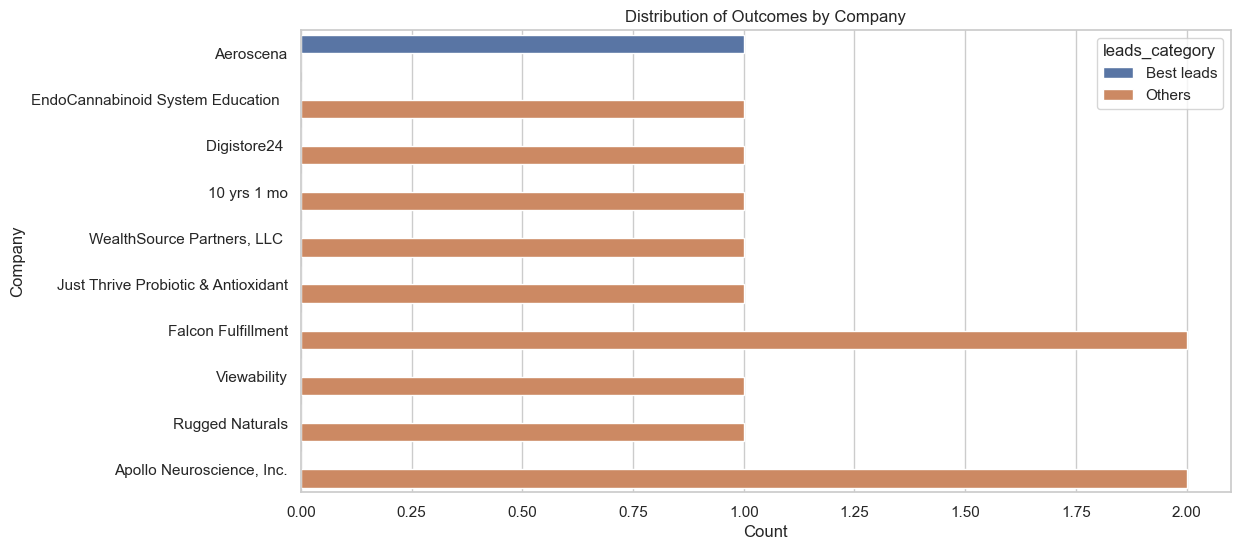

In [23]:
# analyzing the distribution of outcomes across different companies
top_companies = linkedin_data['company'].value_counts().head(10).index
data_top_companies = linkedin_data[linkedin_data['company'].isin(top_companies)]

plt.figure(figsize=(12, 6))
sns.countplot(data=data_top_companies, y='company', hue='leads_category')
plt.title('Distribution of Outcomes by Company')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

We'll also look separately at where the target users are working. 

In [24]:
# check only companies
bl_companies[['profileId', 'company']].T

,0,1,2,3,4,5,6,7,8,9
profileId,mark-kohoot-96a08b1,jonbowerman,parkeralynch,shacharschiff,gary-lacourt-811b1874,lyle-stoflet-38a07ab8,whiteandrewdc,donniemcfall,sykraft,alan-dahl-2a6781b
company,Aeroscena,Kids Draw Bob,HedgeHog Health,BadTestingÂ® â€” Better Software. On Time.,Forever Companies,Stratus Industries / Gear Grove / Containers Up,Align & Co.,McFall Consulting Inc.,Fantastic Brands,BootsUp Co.


Again no correlation, all from different companies. Let's look at the schools where the users were trained. 

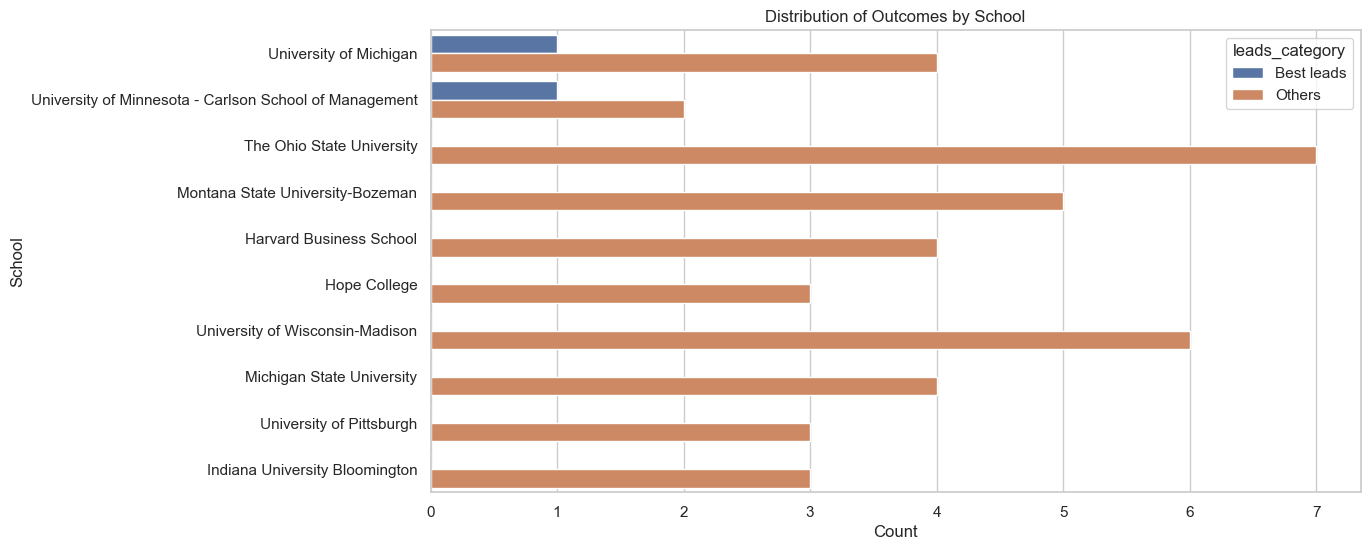

In [25]:
# analyzing the distribution of outcomes across different locations
top_schools = linkedin_data['school'].value_counts().head(10).index
data_top_schools = linkedin_data[linkedin_data['school'].isin(top_schools)]

plt.figure(figsize=(12, 6))
sns.countplot(data=data_top_schools, y='school', hue='leads_category')
plt.title('Distribution of Outcomes by School')
plt.xlabel('Count')
plt.ylabel('School')
plt.show()

In [26]:
# check only schools
bl_companies[['profileId', 'school']].T

,0,1,2,3,4,5,6,7,8,9
profileId,mark-kohoot-96a08b1,jonbowerman,parkeralynch,shacharschiff,gary-lacourt-811b1874,lyle-stoflet-38a07ab8,whiteandrewdc,donniemcfall,sykraft,alan-dahl-2a6781b
school,Audencia Nantes Ecole de Management,University of Michigan,New York University,DeVry University,Northwestern University,Waukesha County Technical College,Palmer College of Chiropractic,University of Minnesota - Carlson School of Ma...,California State University-Northridge,Oklahoma State University


It's even amazing how different and unique our users are. Finally, let's look at the basic skills. Let's summarize the top 5 skills in each group. 

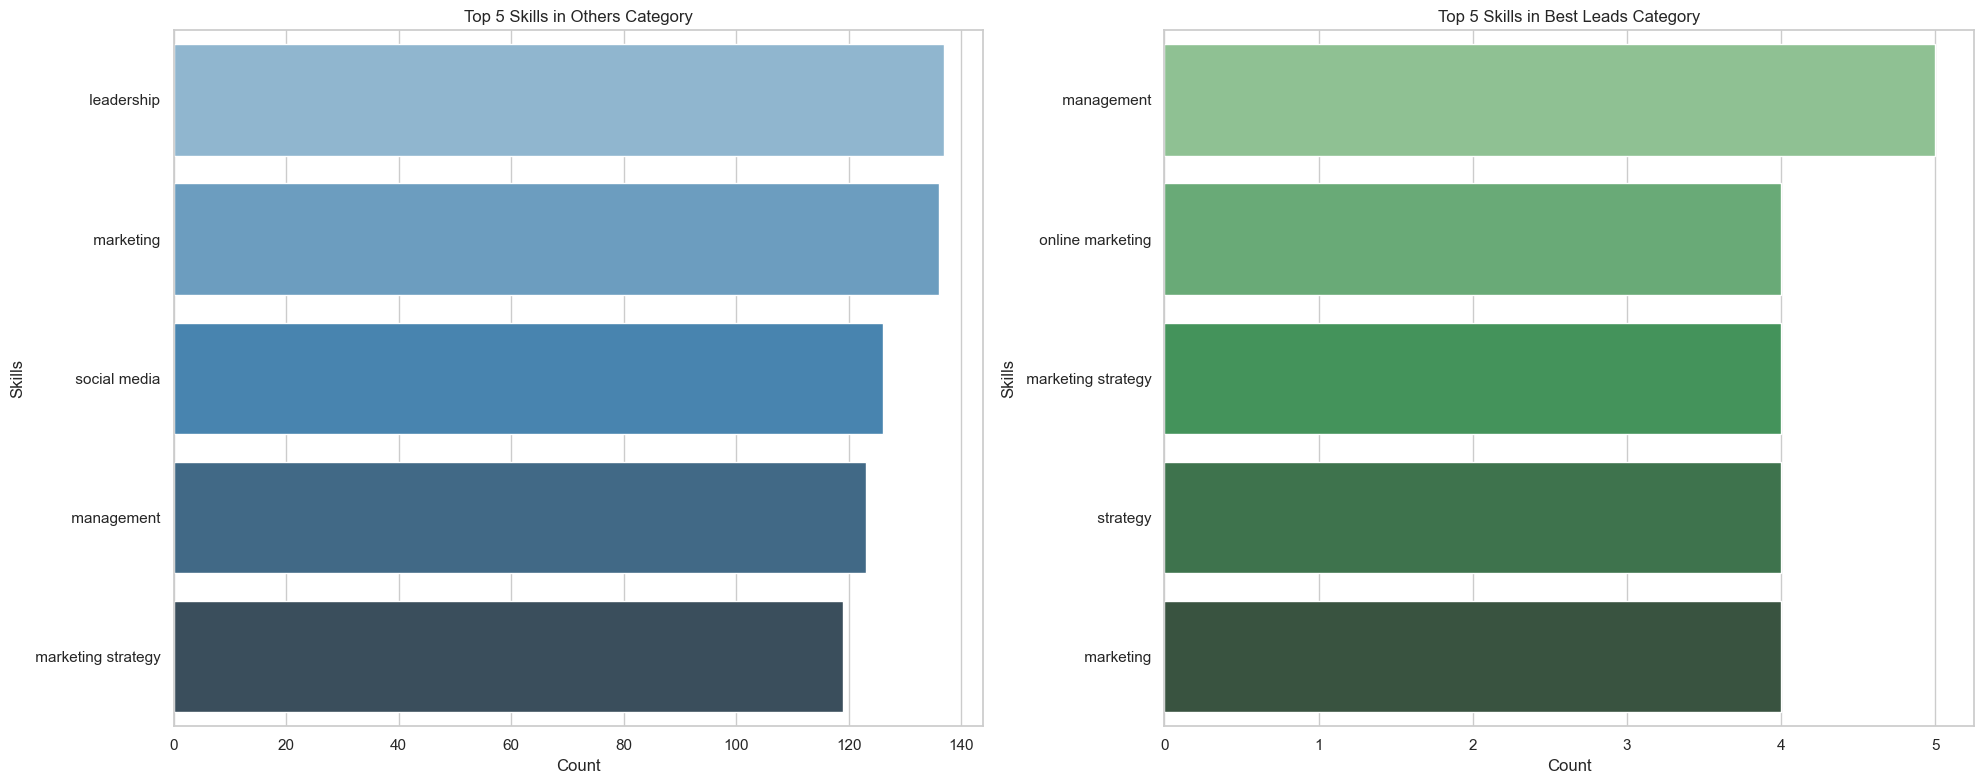

In [27]:
# setting the style
sns.set(style="whitegrid")

# reset the current index and create a new unique index
linkedin_data.reset_index(drop=True, inplace=True)

# expand the list so that each item in the list is a separate line
linkedin_data_expanded = linkedin_data.explode('skills_list')

# categorize the data
data_others = linkedin_data_expanded[linkedin_data_expanded['leads_category'] == 'Others']
data_best_leads = linkedin_data_expanded[linkedin_data_expanded['leads_category'] == 'Best leads']

# finding the top 5 skills for each category
top_skills_others = data_others['skills_list'].value_counts().head(5)
top_skills_best_leads = data_best_leads['skills_list'].value_counts().head(5)

# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))


# horizontal histogram for the 'Others' category
sns.barplot(x=top_skills_others.values, y=top_skills_others.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 5 Skills in Others Category')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Skills')

# horizontal histogram for the 'Best leads' category
sns.barplot(x=top_skills_best_leads.values, y=top_skills_best_leads.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 5 Skills in Best Leads Category')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Skills')

plt.tight_layout()
plt.show()


Here, too, there are no particular differences. Note that for the target group the skill "leadership" is not among the top five most common skills, unlike the other groups. 

### Final assessment

A comprehensive analysis of the data provided was conducted. It was obtained that the target group of users is no more than 3% of all studied profiles. In absolute figures it is only 10 users, so the study of their profiles does not allow to make a detailed description of potentially profitable users. 

Users who performed one of the target actions (ordered both a ticket and a subscription or only bought a ticket) are mostly ceo or founders by profession. A couple of people are also categorized as owner and managing partner. All target users are from America, but from different cities. So it is also impossible to identify any correlation here. 

Distribution of users by number of subscribers showed that target users do not stand out by this criterion in any way - they (with a single exception) do not have more than 2500 subscribers.
All users are from different companies, including target users.The same can be said about schools. Analysis of the top 5 skills for the target group and other users also did not allow us to make a clear distinction between the latter. It can be said that for the target group the skill 'leadership' is not among the top five most common skills, unlike the rest of the group. 

Thus, based on the data obtained and the analysis performed, it is almost impossible to separate the target group of users from the rest.Perhaps analysis by machine learning methods (division into trees or clusters) will help here, as it will allow to take into account all attributes in the aggregate. 